In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway

In [39]:
sns.set_theme(style='whitegrid')

In [40]:
df = pd.read_csv('data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [41]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [42]:
df.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

In [67]:
numberCols = df.select_dtypes(include='number').columns.to_list()
stringCols = df.select_dtypes(exclude='number').columns.to_list()

In [70]:
for cols in stringCols:
    print(cols)
    print(df[cols].unique())

job_title
['Data Engineer' 'Data Scientist' 'BI Developer' 'Research Analyst'
 'Business Intelligence Developer' 'Data Analyst'
 'Director of Data Science' 'MLOps Engineer' 'Machine Learning Scientist'
 'Machine Learning Engineer' 'Data Science Manager' 'Applied Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Business Intelligence Engineer' 'Data Science' 'Research Scientist'
 'Research Engineer' 'Managing Director Data Science' 'AI Engineer'
 'Data Specialist' 'Data Architect' 'Data Visualization Specialist'
 'ETL Developer' 'Data Science Practitioner' 'Computer Vision Engineer'
 'Data Lead' 'ML Engineer' 'Data Developer' 'Data Modeler'
 'Data Science Consultant' 'AI Architect' 'Data Analytics Manager'
 'Data Science Engineer' 'Data Product Manager' 'Data Quality Analyst'
 'Data Strategist' 'Prompt Engineer' 'Data Science Lead'
 'Business Intelligence Manager' 'Data Manager' 'Data Analytics Lead'
 'Machine Learning Infrastructure Engineer' 'Data Integration Engineer

# What is the work models in the data roles?

In [53]:
workModels = df['work_models'].value_counts()

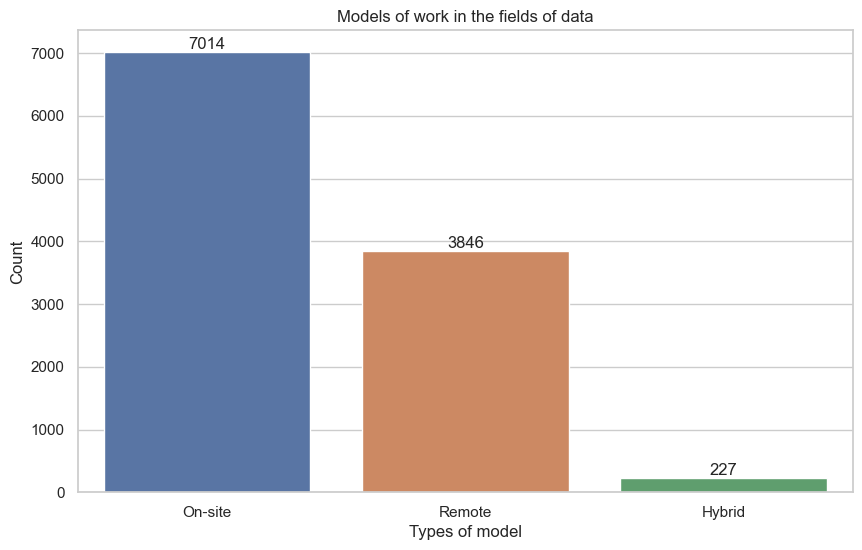

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=workModels.index, y=workModels.values)
for i, val in enumerate(workModels.values):
    plt.text(i, val+i, str(val), ha='center', va='bottom')
plt.title('Models of work in the fields of data')
plt.xlabel('Types of model')
plt.ylabel('Count')
plt.show()

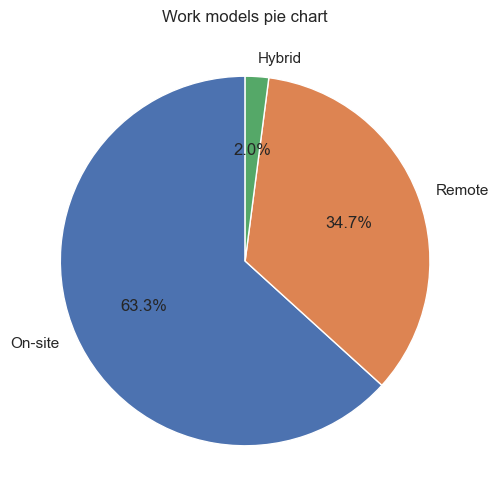

In [55]:
plt.figure(figsize=(10,6))
plt.pie(workModels.values, labels=workModels.index, autopct='%1.1f%%', startangle=90)
plt.title('Work models pie chart')
plt.show()

Based on the plot above, we can see that most of the workers work on-site than remote or hybrid. We can gain more insight if we know what's the type/size of the company that most of the remote workers work at. In addition, we can gain more insights about the industries if we know the value counts of each company sizes.

In [60]:
companySizes = df['company_size'].value_counts()

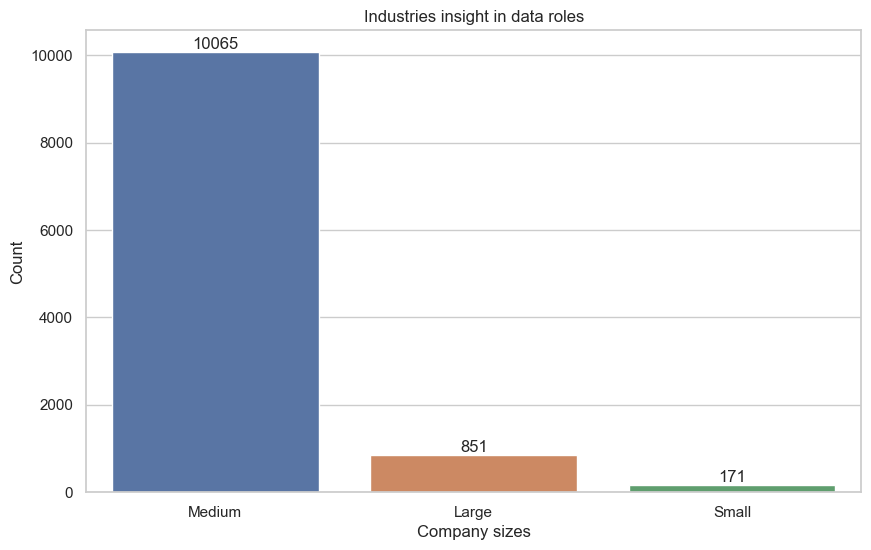

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=companySizes.index, y=companySizes.values)
for i, val in enumerate(companySizes.values):
    plt.text(i, val+i, str(val), ha='center', va='bottom')
plt.title('Industries insight in data roles')
plt.xlabel('Company sizes')
plt.ylabel('Count')
plt.show()

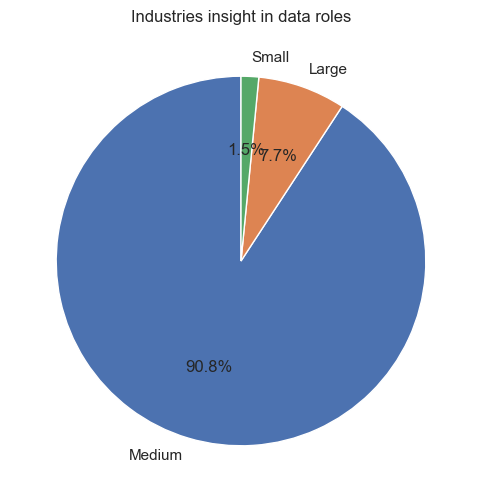

In [63]:
plt.figure(figsize=(10,6))
plt.pie(companySizes.values, labels=companySizes.index, autopct='%1.1f%%', startangle=90)
plt.title('Industries insight in data roles')
plt.show()

There're 3 company sizes based on the dataframe, let's merge that data to the work models to know what model for each company sizes.

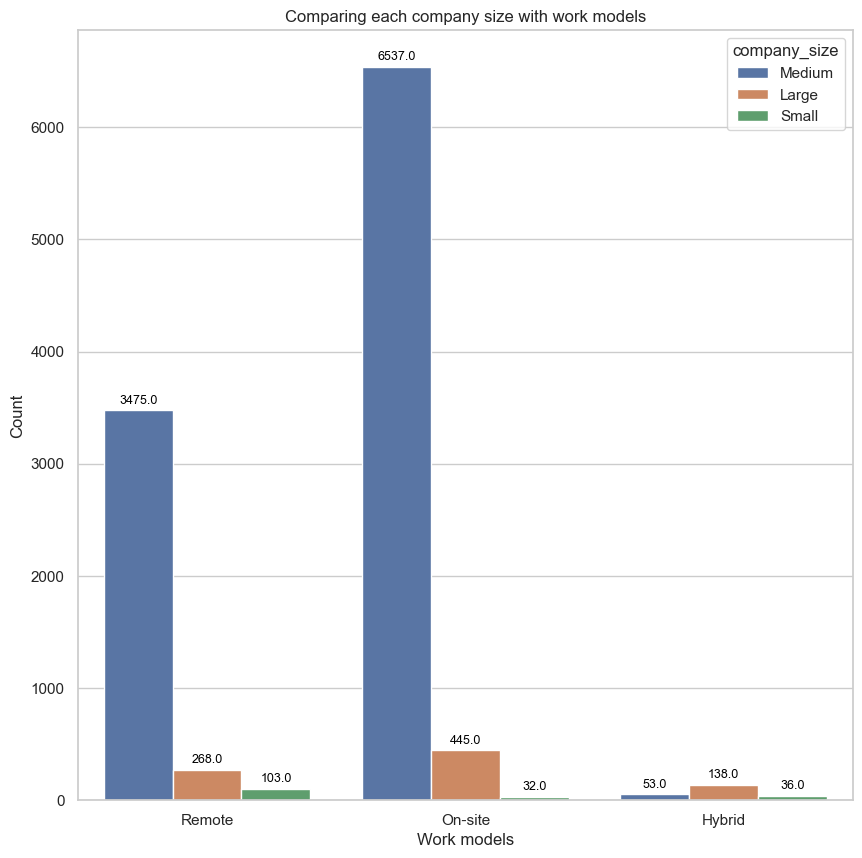

In [65]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x='work_models', hue='company_size', data=df)

# Add counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Comparing each company size with work models')
plt.xlabel('Work models')
plt.ylabel('Count')
plt.show()

based on the plot above, you can see that most of the workers work on-site than hybrid or remote

Based on the exploration above we can conclude several points below:
- Small companies tend to use remote work models than on-site
- Medium and large companies use all of the three work models (remote, on-site, and hybrid)
- Most of the medium and large companies use on-site work models however there're some companies that use remote or hybrid work models. However, hybrid work model is less used by companies.
- Almost all of the data roles works on Medium companies which is 90.8%

# In what country should i work if i want to achieve high salary?

To answer this question, we need to perform several analysis below:
1. Frequency analysis
2. Distribution analysis

In [121]:
countryValueCount = df.groupby('company_location')[['company_location']].value_counts().reset_index()
countryValueCount.describe()

,count
count,75.000000
mean,147.826667
std,1112.598509
min,1.000000
25%,2.000000
50%,3.000000
75%,8.500000
max,9637.000000


In [124]:
countryValueCount

,company_location,count
0,Algeria,1
1,Andorra,1
2,Argentina,5
3,Armenia,1
4,Australia,34
...,...,...
70,Ukraine,6
71,United Arab Emirates,3
72,United Kingdom,513
73,United States,9637


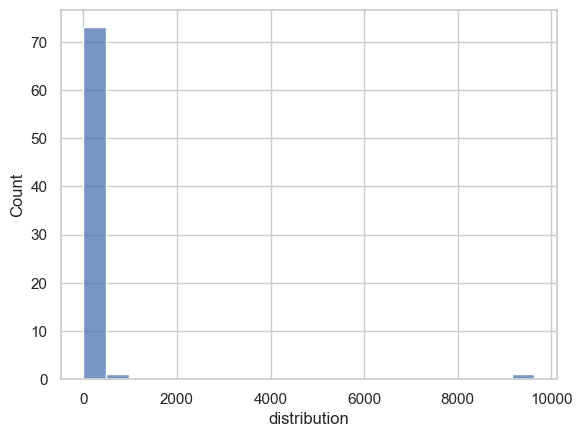

In [135]:
sns.histplot(countryValueCount['count'], bins=20)
plt.xlabel('distribution')
plt.show()

based on the descriptive statistics above, we can see that some countries only have 1 recorded data. In addition, in the histogram visualization we can see that the data is extremely skewed to the right which means that there are some countries that has extremely high values than most of the countries.

After the freqency and distribution analysis above, we can conclude that the dataset has high variance. In order to conduct further analysis we need to apply some normalization to deal with this extremely skewed dataset.

In [139]:
countryValueCountCopy = countryValueCount.copy(True)
scaler = MinMaxScaler()
countryValueCountCopy['count'] = scaler.fit_transform(countryValueCount['count'].values.reshape(-1,1))
countryValueCountCopy

,company_location,count
0,Algeria,0.000000
1,Andorra,0.000000
2,Argentina,0.000415
3,Armenia,0.000000
4,Australia,0.003425
...,...,...
70,Ukraine,0.000519
71,United Arab Emirates,0.000208
72,United Kingdom,0.053134
73,United States,1.000000


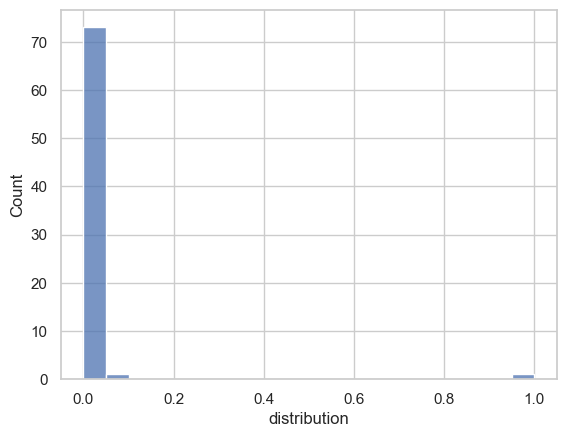

In [140]:
sns.histplot(countryValueCountCopy['count'], bins=20)
plt.xlabel('distribution')
plt.show()

It seems that the distribution doesn't change at all, this means that the nature of the data is it is what it is. Hence, we need to give a note for the answer of this question which is the dataset is highly skewed and has high variance.

In [167]:
countryInsight = df.groupby('company_location')[['salary_in_usd']].mean().reset_index().set_index('company_location').rename(columns={'salary_in_usd' : 'avg_salary_in_usd'}).sort_values(by='avg_salary_in_usd', ascending=False)

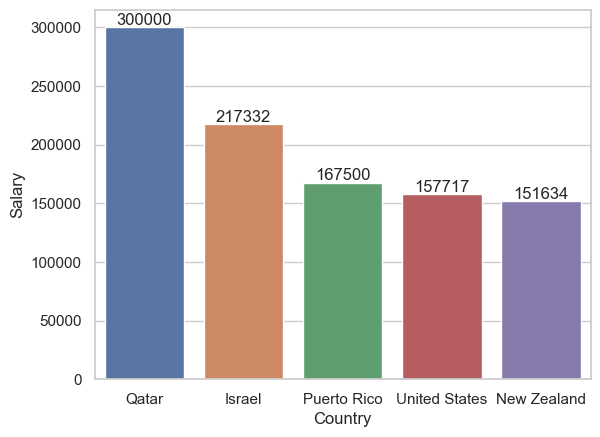

In [168]:
sns.barplot(data=countryInsight[:5], x=countryInsight.index[:5], y='avg_salary_in_usd')
for i, val in enumerate(countryInsight.values[:5]):
    plt.text(i, val+i, f'{val[0]:.0f}', ha='center', va='bottom')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

Above is the top 5 countries that has the highest salary for data roles, however the dataset is highly skewed to the right and has high variance. Therefore, this insights might be invalid due to the dataset

# What column affect a salary?

We need to know how many columns available in the dataset first.

In [171]:
print(f'We have {len(df.columns)} columns in the dataset')

We have 11 columns in the dataset


Since there're numerical and categorical columns within the dataset, we need to separate that columns first before conducting any analysis.

In [172]:
categoricalCols = df.select_dtypes(exclude='number').columns.to_list()
numericalCols = df.select_dtypes(include='number').columns.to_list()
print(f'For categorical columns we have {categoricalCols}')
print(f'For numerical columns we have {numericalCols}')

For categorical columns we have ['job_title', 'experience_level', 'employment_type', 'work_models', 'employee_residence', 'salary_currency', 'company_location', 'company_size']
For numerical columns we have ['work_year', 'salary', 'salary_in_usd']


We need to dive deeper on the work_year columns as we still dont know if the dataset only covers 2024 or maybe another previous year

In [174]:
print(f'{df["work_year"].unique()}')

[2024 2023 2022 2021 2020]


As you can see above, we have a range from 2020 to 2024. This insights might be useful to conduct further analysis. However, right now we're focusing on answering the question written in the heading.

In [194]:
def getANOVA(df, cols, alpha=0.05):
    for col in cols:
        uniqueVal = df[col].unique()
        groups = [df['salary_in_usd'][df[col] == unique] for unique in uniqueVal]
        _, p_value = f_oneway(*groups)
        if p_value < alpha:
            print(f'{col} Reject null hypothesis with p value of {p_value}')
        else:
            print(f'{col} Accept null hypothesis with p value of {p_value}')

getANOVA(df, categoricalCols)

job_title Reject null hypothesis with p value of 0.0
experience_level Reject null hypothesis with p value of 0.0
employment_type Reject null hypothesis with p value of 1.6129319463843155e-13
work_models Reject null hypothesis with p value of 1.394407730732751e-65
employee_residence Reject null hypothesis with p value of 2.7583328366105273e-286
salary_currency Reject null hypothesis with p value of 2.377176831096095e-301
company_location Reject null hypothesis with p value of 1.7041484104239062e-272
company_size Reject null hypothesis with p value of 2.128929158434078e-41


Based on the ANOVA test above, we can see all the columns reject the null hypothesis which means that there's a significant difference in the mean of the salary in one or more groups. In addition, we can see that job_title and experience_level has 0 p value which means both of that features mean is different from mean of the salary indicating both features probably has stronger relationship to the salary.

Since job_title and experience_level has interesting p value, lets visualize both features in order to know the relationships to the salary. However, job_title has 173 unique value which will be cluttered to be visualized therefore here we use N-rank visualization. Both features will be visualized using boxplot visualization.

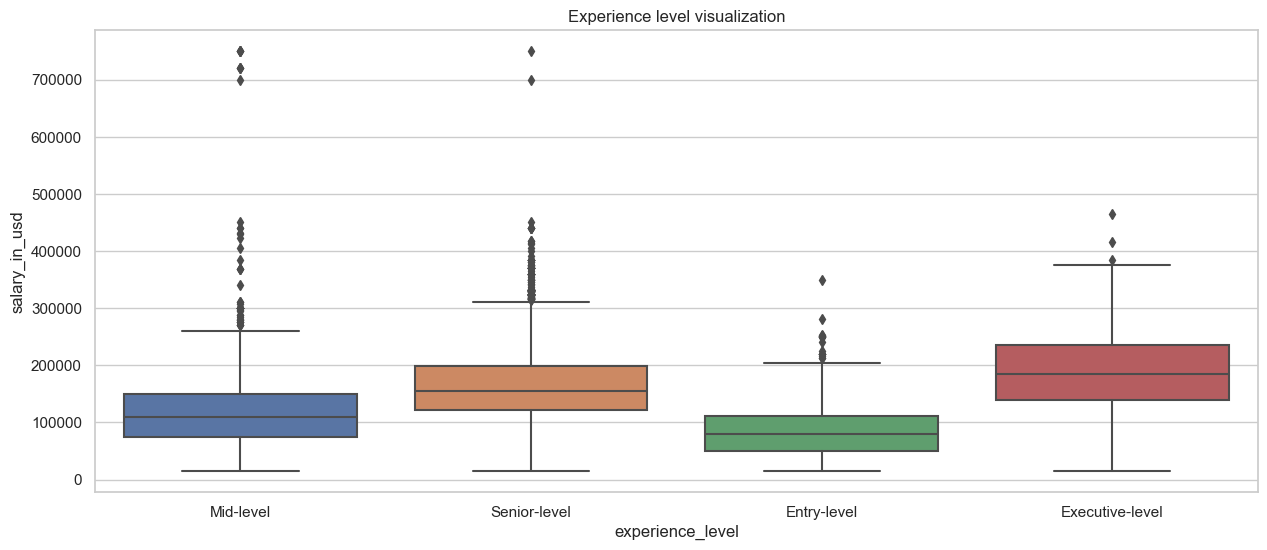

In [195]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Experience level visualization')
plt.show()

As you can see above, it seems like most of the box is not widely overlapped. This means, there's a relationship between experience_level and salary.

# What role has the highest salary?

# Summary